In [1]:
import cv2                            #to read the image into a numpy array
import numpy as np                    #to manipulate the image and its channels
from matplotlib import pyplot as plt  #to show the image
from numpy.linalg import norm

Reading and showing the image

(460, 463, 3)


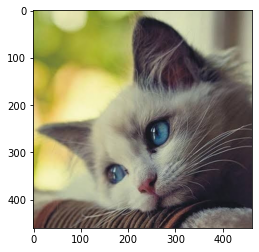

In [2]:
img = cv2.imread('blue_eyed_cat.jpg')
print(img.shape) #confirming that there are 3 channels

plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

1 - Transposing the matrix

In [3]:
img_transposed = img.T
print(img_transposed.shape)

(3, 463, 460)


Let's try transposing each channel seperately so that we can show the image

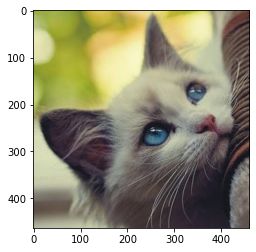

In [4]:
b = img[:,:,0].T
g = img[:,:,1].T
r = img[:,:,2].T

img_t = np.dstack((r,g,b)) #stacks the three channels

plt.imshow(img_t)
plt.show()

2 - Checking if our matrix is of a special type

In [5]:
print(img_transposed.shape)

(3, 463, 460)


Clearly, our matrix is not a square one. Therefore, we'll select a square sub matrix from each color channel

First, let's define a few functions to avoid code repetition

In [6]:
def is_diagonal(mat, dim):
#this functions checks whether mat is diagonal
    diag = True
    
    for i in range(dim):
        for j in range(dim):
            if i != j and mat[i,j] != 0:
                diag = False
                break
            
    return diag

####

def is_identity(mat, dim):
#this function checks whether mat is the identity matrix
    ident = True
    
    for i in range(dim):
        for j in range(dim):
            if i != j and mat[i,j] != 0:
                ident = False
                break
            if i == j and mat[i,j] != 1:
                ident = False
                break
            
    return ident

####

def is_upper_triang(mat, dim):
#this function checks whether mat is an upper triangular matrix
    u_triang = True
    
    for i in range(1,dim):
        for j in range(i):
            if mat[i,j] != 0:
                u_triang = False
                break
            
    return u_triang

####

def is_lower_triang(mat, dim):
#this function checks whether mat is a lower triangular matrix
    l_triang = True
    
    for i in range(dim):
        for j in range(i+1, dim):
            if mat[i,j] != 0:
                l_triang = False
                break

    return l_triang

In [7]:
#Testing the functions on simple matrices
####
mat_1 = np.array([[1,0,0],
                  [0,2,0],
                  [0,0,3]])

print(is_diagonal(mat_1,3))

####
mat_2 = np.array([[1,0,0],
                  [0,1,0],
                  [0,0,1]])

print(is_identity(mat_2,3))

####
mat_3 = np.array([[1,5,7],
                  [0,2,8],
                  [0,0,9]])

print(is_upper_triang(mat_3,3))

####
mat_4 = np.array([[1,0,0],
                  [5,2,0],
                  [7,8,9]])

print(is_lower_triang(mat_4,3))

True
True
True
True


Now, let's test them on our image's sub matrices

In [8]:
sub_img_B = img[0:460, 0:460, 0]
sub_img_G = img[0:460, 0:460, 1]
sub_img_R = img[0:460, 0:460, 2]

print("BLUE CHANNEL")
print("Diagonal:         ",is_diagonal(sub_img_B, 460))
print("Identity:         ",is_identity(sub_img_B, 460))
print("Upper triangular: ",is_upper_triang(sub_img_B, 460))
print("Lower triangular: ",is_lower_triang(sub_img_B, 460))

####

print("\n\nGREEN CHANNEL")
print("Diagonal:         ",is_diagonal(sub_img_G, 460))
print("Identity:         ",is_identity(sub_img_G, 460))
print("Upper triangular: ",is_upper_triang(sub_img_G, 460))
print("Lower triangular: ",is_lower_triang(sub_img_G, 460))

####

print("\n\nRED CHANNEL")
print("Diagonal:         ",is_diagonal(sub_img_R, 460))
print("Identity:         ",is_identity(sub_img_R, 460))
print("Upper triangular: ",is_upper_triang(sub_img_R, 460))
print("Lower triangular: ",is_lower_triang(sub_img_R, 460))

BLUE CHANNEL
Diagonal:          False
Identity:          False
Upper triangular:  False
Lower triangular:  False


GREEN CHANNEL
Diagonal:          False
Identity:          False
Upper triangular:  False
Lower triangular:  False


RED CHANNEL
Diagonal:          False
Identity:          False
Upper triangular:  False
Lower triangular:  False


3 - Calculating norms on a column vector

In [9]:
vect = img[:,0,0]

print("l1 norm = ", norm(vect,1))
print("l2 norm = ", norm(vect))

l1 norm =  41866.0
l2 norm =  2091.3273297119226
